<Axes: >

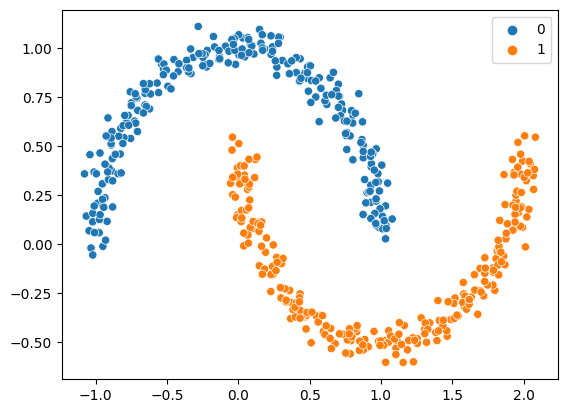

In [1]:
# the two moons dataset is a popular toy binary classification dataset
from sklearn.datasets import make_moons
import seaborn as sns
# scenario 1: fairly clean dataset
X, y = make_moons(n_samples=500, noise=0.05, random_state=42) # DO NOT change this line
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42) # DO NOT change this line

In [5]:
# I(carson) vibe-coded this visualization pipeline up with deepseek, feel free to use AI tools when you do slightly complicated visualizations or
# pipelines like this, it is allowed in the competitions
# you do need to understand what it's writing and receiving though, to make quick changes (I made quite a few quick changes to make the plots visually better)
# and debug the processes effectively.

# in the selection there will be a manual python-writing round where there will be no LLMs to support you, and in the international competition they would not
# want the AI tools to give you every conceptual idea for the tasks.
def visualize_model():
    plt.figure(figsize=(5, 4))
    # Plot the training data
    scatter = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='winter', edgecolors='k', s=50, alpha=0.6, label='Training Data')
    legend1 = plt.legend(*scatter.legend_elements(), title="Classes")
    plt.gca().add_artist(legend1)
    # Use DecisionBoundaryDisplay to plot the decision boundary
    # This is the modern, clean method introduced in scikit-learn 1.1
    DecisionBoundaryDisplay.from_estimator(
        model,
        X_train,
        plot_method="contourf",
        alpha=0.7,
        ax=plt.gca(),
    )
    # Also add the decision boundary as a solid line
    DecisionBoundaryDisplay.from_estimator(
        model,
        X_train,
        plot_method="contour",
        levels=[0], # This plots the line where the decision function is 0
        linestyles=["--"],
        linewidths=2,
        colors='k', # Black line
        ax=plt.gca(),
    )
    # Add labels and title
    plt.grid(True, alpha=0.3)
    plt.show()
def evaluate_model(y_train, train_preds, y_val, val_preds, visualize=True):
    print("Training dataset classification report:")
    print(classification_report(y_train, train_preds))
    print(confusion_matrix(y_train, train_preds))
    print("Validation classification report:")
    print(classification_report(y_val, val_preds))
    print(confusion_matrix(y_val, val_preds))
    if visualize == True:
      visualize_model()

# Part 1: Train an SVM model

Training dataset classification report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.88       207
           1       0.87      0.88      0.88       193

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400

[[182  25]
 [ 23 170]]
Validation classification report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        43
           1       0.92      0.86      0.89        57

    accuracy                           0.88       100
   macro avg       0.88      0.88      0.88       100
weighted avg       0.88      0.88      0.88       100

[[39  4]
 [ 8 49]]


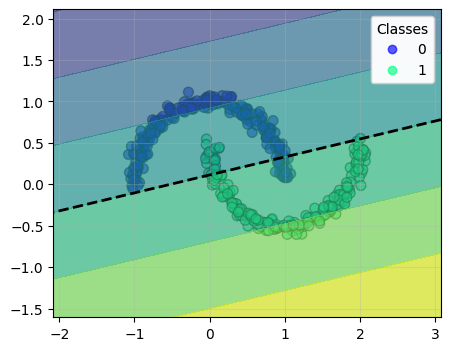

In [6]:
from sklearn.svm import LinearSVC # LinearSVC: linear SVM classifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt
model = LinearSVC(C=1) # try adjusting the C hyperparameter to see how it goes!
model.fit(X_train, y_train)
train_preds = model.predict(X_train)
preds = model.predict(X_val)
evaluate_model(y_train, train_preds, y_val, preds)

#Write your observations here:

The dataset (is / is not) linearly separable (remove the incorrect option)

For low C, the model performance ________.

For high C, the model performance __________.

# Part 2: Explore Different Choices of Kernels

Training dataset classification report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.88       207
           1       0.87      0.88      0.88       193

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400

[[182  25]
 [ 23 170]]
Validation classification report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        43
           1       0.92      0.86      0.89        57

    accuracy                           0.88       100
   macro avg       0.88      0.88      0.88       100
weighted avg       0.88      0.88      0.88       100

[[39  4]
 [ 8 49]]


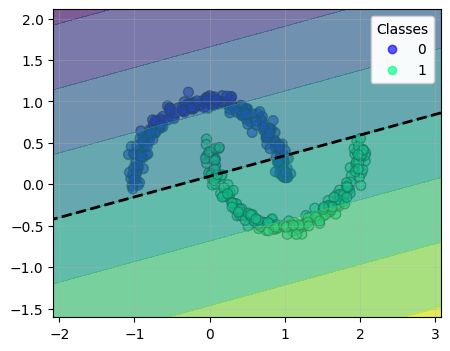

In [8]:
from sklearn.svm import SVC # SVC: SVM classifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt
model = SVC(kernel='linear') # this is the linear SVC
model.fit(X_train, y_train)
train_preds = model.predict(X_train)
preds = model.predict(X_val)
evaluate_model(y_train, train_preds, y_val, preds)
# try to change the 'kernel' hyperparameter to improve your validation scores!

# Write your observations here:

There are 4 kernels that are configured into the SVC by default. (If you're not sure which four see the documentation for the SVC in sklearn)

The ______ kernel achieves a validation F1 score of ______

The ______ kernel achieves a validation F1 score of ______

The ______ kernel achieves a validation F1 score of ______

The ______ kernel achieves a validation F1 score of ______

The best kernel for this setup is ______.

# Part 3: Multi-class Classification

In [ ]:
import pandas as pd
penguins = pd.read_csv("https://raw.githubusercontent.com/allisonhorst/palmerpenguins/c19a904462482430170bfe2c718775ddb7dbb885/inst/extdata/penguins.csv")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


<Axes: >

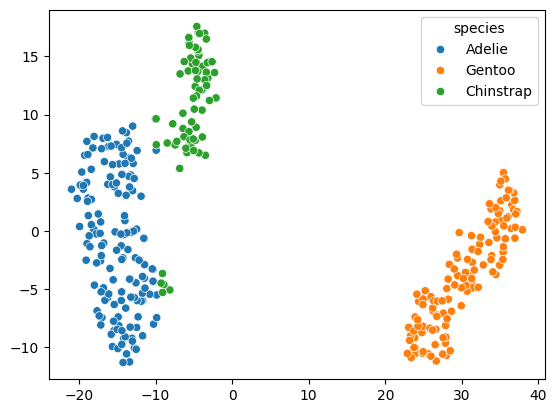

In [ ]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
penguins = penguins.dropna() # drop rows with NaN values
X = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
X_scaled = StandardScaler().fit_transform(X)
y = penguins['species']
tsne = TSNE()
pca = PCA(n_components=2)
# which one is better?
X_reduced = tsne.fit_transform(X_scaled)
#X_reduced = pca.fit_transform(X_scaled) # comment this line out to try the tsne
sns.scatterplot(x=X_reduced[:,0], y=X_reduced[:,1], hue=y)

# Write your observations here:

1. (PCA / TSNE) separates the dataset better. (remove the incorrect option). The reason is that ____________.

2. If you remove the standard scaling (done via StandardScaler) in the data preprocessing, the separation is (good / not very good). A possible reason is that ___________.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42) # DO NOT change this line

In [ ]:
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import f1_score
import numpy as np
cv = KFold(n_splits=5, shuffle=True, random_state=42)
scores = []
X = np.array(X) # convert everything to numpy array format first to avoid confusion in data processing later on
# scikit-learn natively takes in np.array but not pd.DataFrame
for i, (train_idx, val_idx) in enumerate(cv.split(X)):
    X_train_fold, X_val_fold = X[train_idx], X[val_idx]
    y_train_fold, y_val_fold = y[train_idx], y[val_idx]
    model = LinearSVC(C=1, random_state=42)  # Added random_state for reproducibility
    model.fit(X_train_fold, y_train_fold)
    val_preds = model.predict(X_val_fold)
    scores.append(f1_score(y_val_fold, val_preds, average='macro'))
print(sum(scores) / len(scores))

0.989334835644693


# Write your observations here

This F1 scoring scheme may not actually be the most rigorous. The reason is _______________

Suggest a better method for the model evaluation in the next code block.

In [ ]:
# better evaluation method
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import f1_score
import numpy as np
cv = KFold(n_splits=5, shuffle=True, random_state=42)
scores = []
# YOUR CODE HERE
for i, (train_idx, val_idx) in enumerate(cv.split(X)):
    X_train_fold, X_val_fold = X[train_idx], X[val_idx]
    y_train_fold, y_val_fold = y[train_idx], y[val_idx]
    model = LinearSVC(C=1, random_state=42)  # Added random_state for reproducibility
    model.fit(X_train_fold, y_train_fold)
    val_preds = model.predict(X_val_fold)
    # YOUR CODE HERE
print(final_f1_score)